# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Importing Dataset

In [2]:
Movies= pd.read_csv('movies.dat', sep='::', engine='python', encoding='ISO-8859-1',names=["MovieID","Title","Category"])
Movies.dropna(inplace=True)
Movies.head(10)


,MovieID,Title,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [3]:
Users = pd.read_csv('users.dat',sep="::",engine='python',encoding='ISO-8859-1',names=['UserID','Gender','Age','Occupation','zip-code'])
Users.dropna(inplace=True)
Users.head(10)

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [4]:
Ratings= pd.read_csv('ratings.dat',sep="::",engine='python',encoding='ISO-8859-1',names=['ID','MovieID','Rating','TimeStamp'])
Ratings.dropna(inplace=True)
Ratings.head(10)

,ID,MovieID,Rating,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


# Concatinating all 3 dataset

In [5]:
# Concatenate the three dataframes along columns
Newdata = pd.concat([Movies,Ratings,Users],axis=1)

# Display the first 10 rows of the concatenated and cleaned dataframe
Newdata.head(10)

,MovieID,Title,Category,ID,MovieID,Rating,TimeStamp,UserID,Gender,Age,Occupation,zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,F,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
5,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117
6,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,M,35.0,1.0,06810
7,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,M,25.0,12.0,11413
8,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,M,25.0,17.0,61614
9,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,F,35.0,1.0,95370


In [6]:
Newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieID     3883 non-null     float64
 1   Title       3883 non-null     object 
 2   Category    3883 non-null     object 
 3   ID          1000209 non-null  int64  
 4   MovieID     1000209 non-null  int64  
 5   Rating      1000209 non-null  int64  
 6   TimeStamp   1000209 non-null  int64  
 7   UserID      6040 non-null     float64
 8   Gender      6040 non-null     object 
 9   Age         6040 non-null     float64
 10  Occupation  6040 non-null     float64
 11  zip-code    6040 non-null     object 
dtypes: float64(4), int64(4), object(4)
memory usage: 91.6+ MB


# Data Visualization 

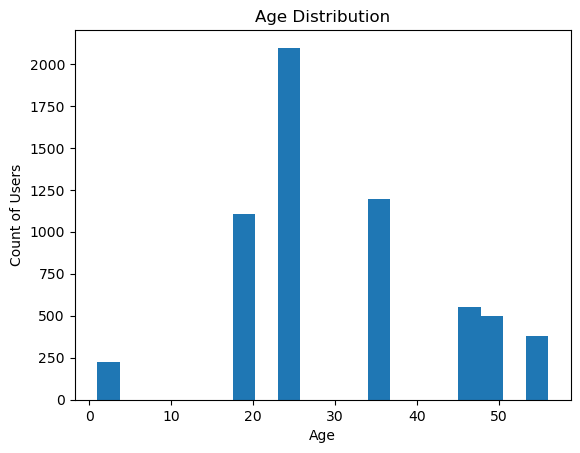

In [7]:
# Plot the age distribution using a bar chart

Newdata.Age.plot.hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count of Users')
plt.title('Age Distribution')
plt.show()

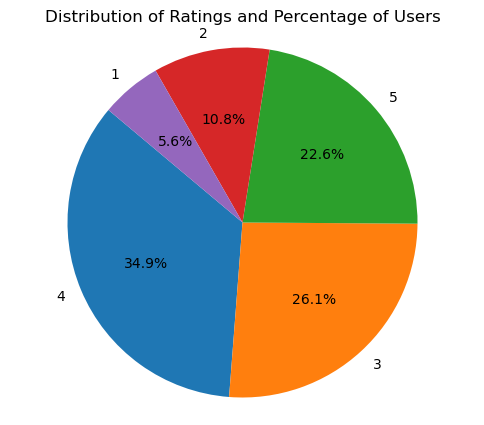

In [8]:
# Count the number of occurrences of each rating

rating_counts = Newdata['Rating'].value_counts()

# Calculate the percentage of users for each rating category
percentage_users = (rating_counts / rating_counts.sum()) * 100

# Plotting the pie chart
plt.figure(figsize=(6, 5))
plt.pie(percentage_users, labels=percentage_users.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings and Percentage of Users')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


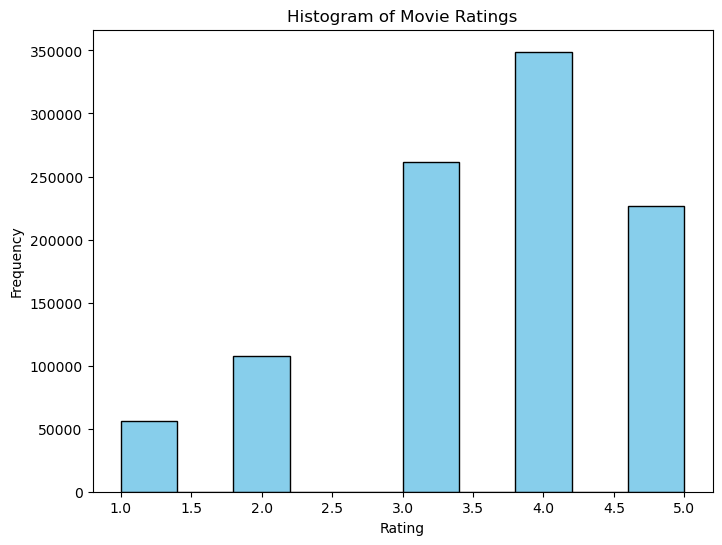

In [9]:
# Plotting a histogram for movie ratings
plt.figure(figsize=(8, 6))
plt.hist(Newdata['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Ratings')
plt.show()


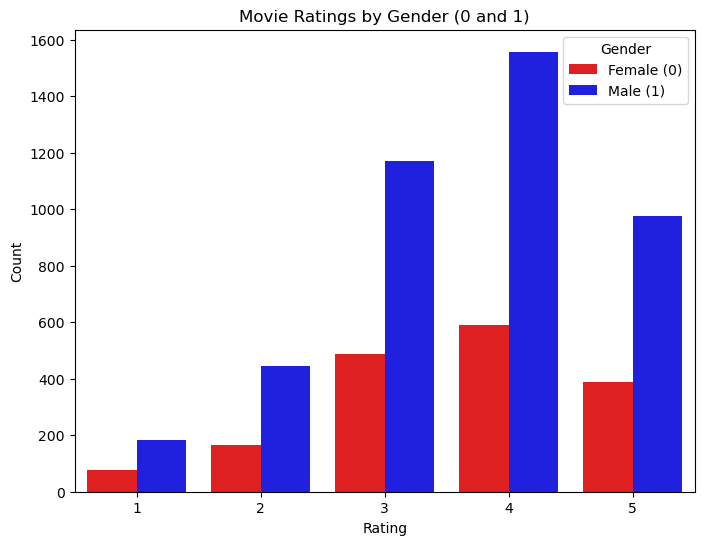

In [10]:
# Assuming you have a DataFrame named 'Newdata' with 'Rating' and 'Gender' columns containing 0s and 1s

# Define custom colors for Gender 0 and Gender 1
custom_colors = ["red", "blue"]

# Create a countplot to visualize ratings by gender with custom colors
plt.figure(figsize=(8, 6))
sns.countplot(x="Rating", hue="Gender", data=Newdata, palette=custom_colors)

# Customize the plot
plt.title("Movie Ratings by Gender (0 and 1)")
plt.xlabel("Rating")
plt.ylabel("Count")

# Show the plot
plt.legend(title="Gender", labels=["Female (0)", "Male (1)"], loc="upper right")
plt.show()



Text(0, 0.5, 'Category')

<Figure size 1000x600 with 0 Axes>

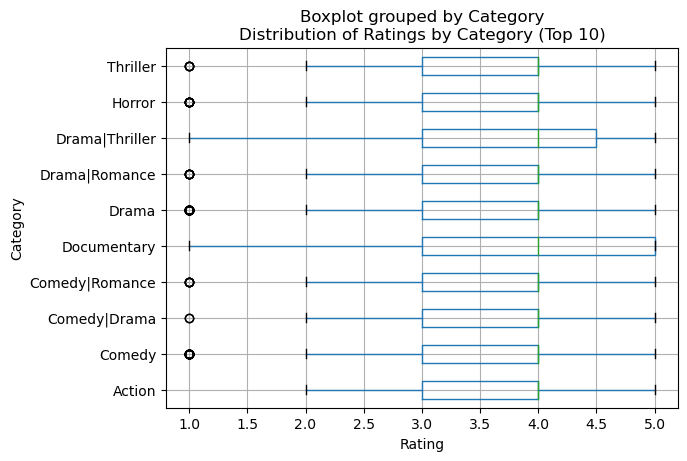

In [11]:
# Assuming you have the Newdata dataframe with the necessary columns

# Calculate the count of movies in each category
category_counts = Newdata['Category'].value_counts()

# Select the top 20 categories
top_10_categories = category_counts.head(10)

# Filter the Newdata dataframe for only the top 10 categories
Newdata_top_10 = Newdata[Newdata['Category'].isin(top_10_categories.index)]

# Boxplot to visualize ratings distribution by category for the top 10 categories
plt.figure(figsize=(10, 6))
Newdata_top_10.boxplot(column='Rating', by='Category', vert=False)
plt.title('Distribution of Ratings by Category (Top 10)')
plt.xlabel('Rating')
plt.ylabel('Category')

# Correlation Matrix

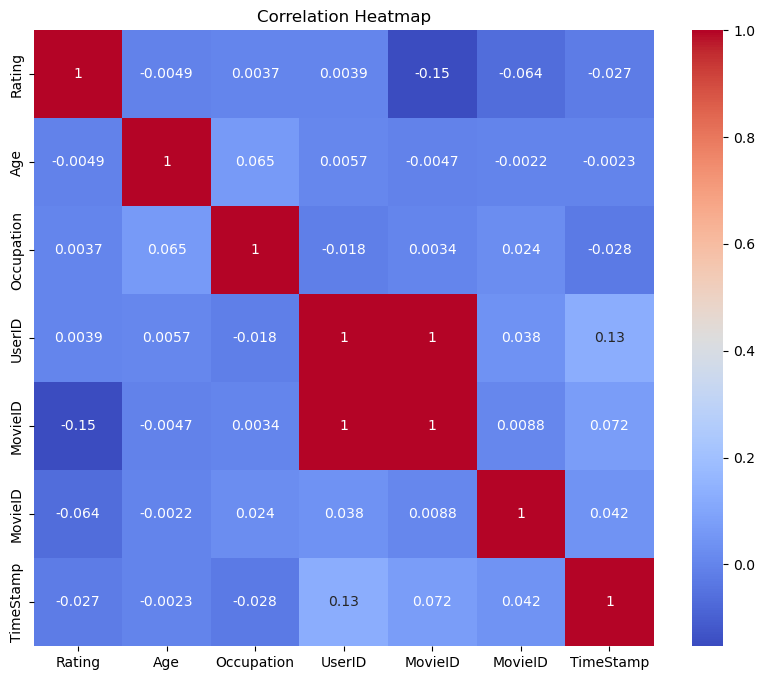

In [12]:
# Select the columns for the correlation matrix
columns = ['Rating', 'Age', 'Occupation','UserID','MovieID','TimeStamp']

# Subset the DataFrame with the selected columns
df_subset = Newdata[columns]

# Calculate the correlation matrix
corr_matrix = df_subset.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
def correlation(data, threshold):
    corr_matrix = data.corr()
    col_corr = set()  # Set of correlated columns
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# Assuming Newdata is your DataFrame and 0.7 is the threshold
corr_features = correlation(Newdata, 0.7)
len(corr_features)


2

In [15]:
corr_features

{'ID', 'UserID'}

In [16]:
#Convert M and F category to binary
Newdata['Gender'].replace(['F','M'],[0,1],inplace=True)


In [17]:
# Calculate the mean of the 'Gender' column (0/1 values)
gender_mean = Newdata['Gender'].mean()

# Replace missing (NaN) values in the 'Gender' column with the mean
Newdata['Gender'].fillna(gender_mean, inplace=True)

# Calculate the mean of the 'TimeStamp'
TimeStamp_mean = Newdata['TimeStamp'].mean()
# Replace missing (NaN) values in the 'TimeStamp' column with the mean
Newdata['TimeStamp'].fillna(TimeStamp_mean, inplace=True)

# Calculate the mean of the age
Age_mean = Newdata['Age'].mean()
# Replace missing (NaN) values in the 'Gender' column with the mean
Newdata['Age'].fillna(Age_mean, inplace=True)

Newdata['TimeStamp'].ffill(inplace=True)  # Forward fill

Newdata['Title'].fillna(Newdata['Title'].mode()[0], inplace=True)

Newdata['Category'].fillna(Newdata['Category'].mode()[0], inplace=True)

Newdata['UserID'].fillna(0, inplace=True)  # Replace with 0 to represent missing

Newdata.loc[:, 'MovieID'].fillna(0, inplace=True)  # Replace with 0 to represent missing

Newdata['zip-code'].fillna(0, inplace=True)  # Replace with 0 to represent missing

Newdata['Occupation'].fillna(0, inplace=True)  # Replace with 0 to represent missing


In [18]:
#Find out all the unique category
#split the genre content from pipe delimited to a list in a new column

Newdata['Category_list'] = Newdata['Category'].str.split('|')

In [19]:
Newdata.head()

,MovieID,Title,Category,ID,MovieID,Rating,TimeStamp,UserID,Gender,Age,Occupation,zip-code,Category_list
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,0.0,1.0,10.0,48067,"[Animation, Children's, Comedy]"
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072,"[Adventure, Children's, Fantasy]"
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117,"[Comedy, Romance]"
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460,"[Comedy, Drama]"
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455,[Comedy]


In [20]:
# Assuming Newdata is your original DataFrame with a 'Category_list' column

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(Newdata['Category_list'].apply(pd.Series).stack()).sum(level=0)

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([Newdata, one_hot_encoded], axis=1)




In [21]:
print(df_encoded.head())

   MovieID                               Title                      Category  \
0      1.0                    Toy Story (1995)   Animation|Children's|Comedy   
1      2.0                      Jumanji (1995)  Adventure|Children's|Fantasy   
2      3.0             Grumpier Old Men (1995)                Comedy|Romance   
3      4.0            Waiting to Exhale (1995)                  Comedy|Drama   
4      5.0  Father of the Bride Part II (1995)                        Comedy   

   ID  MovieID  Rating  TimeStamp  UserID  Gender   Age  ...  Fantasy  \
0   1     1193       5  978300760     1.0     0.0   1.0  ...        0   
1   1      661       3  978302109     2.0     1.0  56.0  ...        1   
2   1      914       3  978301968     3.0     1.0  25.0  ...        0   
3   1     3408       4  978300275     4.0     1.0  45.0  ...        0   
4   1     2355       5  978824291     5.0     1.0  25.0  ...        0   

  Film-Noir Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  


In [22]:
type(df_encoded)

pandas.core.frame.DataFrame

In [23]:
Nd_small = Newdata.iloc[:, [0,5,6,7,8,10,11]]

In [24]:
Nd_small.head()

,MovieID,Rating,TimeStamp,UserID,Gender,Occupation,zip-code
0,1.0,5,978300760,1.0,0.0,10.0,48067
1,2.0,3,978302109,2.0,1.0,16.0,70072
2,3.0,3,978301968,3.0,1.0,15.0,55117
3,4.0,4,978300275,4.0,1.0,7.0,02460
4,5.0,5,978824291,5.0,1.0,20.0,55455


In [25]:
Nd_small.dtypes

MovieID       float64
Rating          int64
TimeStamp       int64
UserID        float64
Gender        float64
Occupation    float64
zip-code       object
dtype: object

In [26]:
Nd_small['zip-code'] = pd.to_numeric(Nd_small['zip-code'], errors='coerce').astype('Int64')


In [27]:
master_features = pd.merge(Nd_small,df_encoded , left_index=True, right_index=True)

In [28]:
master_features.head()

,MovieID_x,Rating_x,TimeStamp_x,UserID_x,Gender_x,Occupation_x,zip-code_x,MovieID_y,Title,Category,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,5,978300760,1.0,0.0,10.0,48067,1.0,Toy Story (1995),Animation|Children's|Comedy,...,0,0,0,0,0,0,0,0,0,0
1,2.0,3,978302109,2.0,1.0,16.0,70072,2.0,Jumanji (1995),Adventure|Children's|Fantasy,...,1,0,0,0,0,0,0,0,0,0
2,3.0,3,978301968,3.0,1.0,15.0,55117,3.0,Grumpier Old Men (1995),Comedy|Romance,...,0,0,0,0,0,1,0,0,0,0
3,4.0,4,978300275,4.0,1.0,7.0,2460,4.0,Waiting to Exhale (1995),Comedy|Drama,...,0,0,0,0,0,0,0,0,0,0
4,5.0,5,978824291,5.0,1.0,20.0,55455,5.0,Father of the Bride Part II (1995),Comedy,...,0,0,0,0,0,0,0,0,0,0


# Model Building and spliting the data into training and test sets

In [29]:
#First 500 extracted records
first_500 = Nd_small[500:]
first_500.dropna(inplace=True)

In [30]:
# Extract the specified features from the first_500 DataFrame
# Use the columns 'MovieID', 'Occupation', and 'UserID' as features
features = first_500[['MovieID', 'Occupation', 'UserID']].values

# Use the 'Rating' column as the label
labels = first_500[['Rating']].values


In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# 'features' contains your feature data and 'labels' contains your label data
# test_size=0.2 specifies that 20% of the data will be used for testing
# random_state=42 sets the random seed for reproducibility
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.2,random_state=42)


# Logistic Regression

In [32]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

35.05

# K Nearest Neighbors Classifier

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

60.47

# Gaussian Naive Bayes

In [34]:
gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

35.76

# Decision Tree

In [35]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

100.0

# Random Forest

In [36]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

100.0

# Linear SVC


In [37]:
linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

22.77

In [38]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
6,Decision Tree,100.00
1,KNN,60.47
4,Naive Bayes,35.76
2,Logistic Regression,35.05
0,Support Vector Machines,22.77
5,Linear SVC,22.77
